In [31]:
import numpy as np
import pandas as pd
import gc
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [2]:
columns=["sentiment", "ids", "date", "flag", "user", "text"]
data=pd.read_csv('../Dataset/raw/data.csv',names=columns,encoding='ISO-8859-1')

In [3]:
data=data[["text","sentiment"]]
data.head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [4]:
gc.collect()

20

In [5]:
data.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

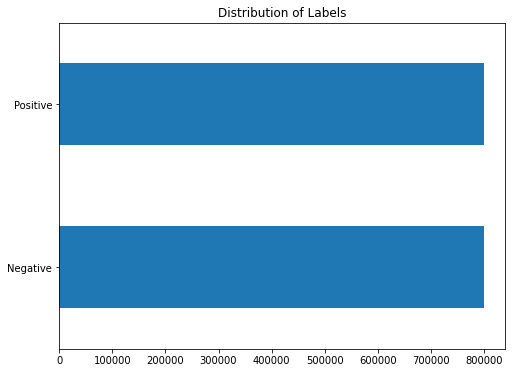

In [5]:
ax=data.sentiment.value_counts().plot(kind='barh',figsize=(8,6),title="Distribution of Labels")
ax.set_yticklabels(['Negative','Positive'], rotation=0)


In [6]:
#Converting Tweets to LowerCase
data["text"]=data.text.str.lower()

#Replacing Links with "URL"
data["text"]=data["text"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "URL")

#Removing the Usernames
data["text"]=data["text"].str.replace(r'@[^\s]+',"")

#Removing all Non Alpha Numeric Characters
data["text"]=data["text"].str.replace(r'[^A-Za-z0-9 ]+',"")

# df[''] = df['Links'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [7]:
data.head()

,text,sentiment
0,URL awww thats a bummer you shoulda got dav...,0
1,is upset that he cant update his facebook by t...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no its not behaving at all im mad why am i he...,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'],test_size = 0.20, random_state = 0)

In [10]:
X_train.shape,X_test.shape

((1280000,), (320000,))

In [12]:
#Vectorsing the Tweets
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [16]:
print ("Vocab Size:",len(vectorizer.get_feature_names()))

Vocab Size: 376857


In [17]:
# Applyting TF-ID
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

In [18]:
X_train.shape

(1280000, 376857)

In [20]:
#Training Logitistic Regression
lr=LogisticRegression(verbose=1)
lr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.9s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [24]:
pred=lr.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred,pos_label=4)
confussion=confusion_matrix(y_test,pred,labels=[0,4])

Text(0.5, 1.05, 'Confussion Matrix')

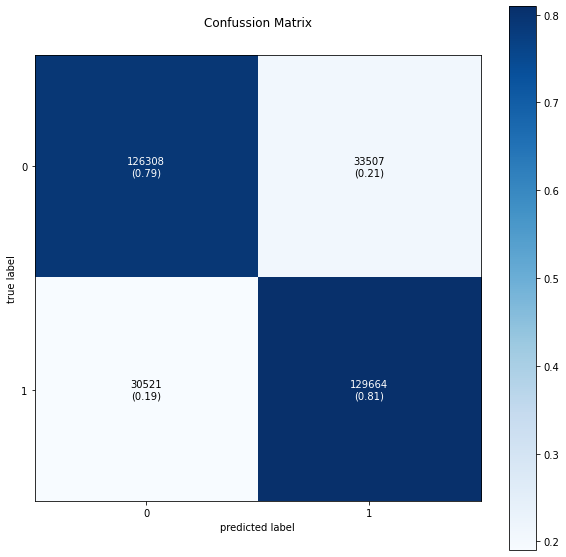

In [32]:
fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

In [33]:
def preprocess(tweet):
    #LowerCase 
    tweet=tweet.lower()

    #Replacing URL
    tweet=tweet.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "URL")

    #Removing Username
    tweet=tweet.replace(r'@[^\s]+',"")

    #Removing Non-Alpha Numeric Chars
    tweet=tweet.replace(r'[^A-Za-z0-9 ]+',"")

    return tweet

In [43]:
#Testing 
tweet="This Notebook sucks"
tweet=preprocess(tweet)
tweet=vectorizer.transform([tweet])
lr.predict(tweet)

array([0])

trump should take the blame for this racism. racism increased after he joined office.
